In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# Run to pandas displays all columns
pd.set_option('display.max_columns', None)

In [7]:
# Import the data
companies = pd.read_csv('./Raw_data/eda_dataset_cleaning/Files/Modified_Unicorn_Companies.csv')
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [8]:
companies.dtypes

Company             object
Valuation            int64
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [9]:
# Convert "Date Joined" column into a datetime dtype
companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

In [10]:
companies["Years To Unicorn"] = companies["Date Joined"].dt.year - companies["Year Founded"] 
companies.head(20)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",6
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",7
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2
9,Databricks,38,2019-02-05,Data management and analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",6


In [11]:
companies.describe()

,Valuation,Date Joined,Year Founded,Years To Unicorn
count,1074.000000,1074,1074.000000,1074.000000
mean,3.445996,2020-05-14 20:22:47.597765376,2012.870577,7.013035
min,1.000000,2007-07-02 00:00:00,1919.000000,-3.000000
25%,1.000000,2019-05-15 06:00:00,2011.000000,4.000000
50%,2.000000,2021-03-26 00:00:00,2014.000000,6.000000
75%,3.000000,2021-09-16 00:00:00,2016.000000,9.000000
max,180.000000,2022-04-05 00:00:00,2021.000000,98.000000
std,8.544242,NaN,5.705494,5.331842


***
### Check negative years to unicorn

In [12]:
negative_years_to_unicorn = companies[ companies["Years To Unicorn"] < 0]
negative_years_to_unicorn

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
527,InVision,2,2017-11-01,Internet software & services,New York,United States,North America,2020,$349M,"FirstMark Capital, Tiger Global Management, IC...",-3


In [13]:
# Replace InVision's `Year Founded` value with 2011

companies.loc[ companies["Years To Unicorn"] == -3, "Year Founded"] = 2011
negative_years_to_unicorn = companies[ companies["Years To Unicorn"] < 0]
negative_years_to_unicorn

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
527,InVision,2,2017-11-01,Internet software & services,New York,United States,North America,2011,$349M,"FirstMark Capital, Tiger Global Management, IC...",-3


In [14]:
# Recalculate all values in the `Years To Unicorn` column

companies["Years To Unicorn"] = companies["Date Joined"].dt.year - companies["Year Founded"] 
companies.describe().round(2)

,Valuation,Date Joined,Year Founded,Years To Unicorn
count,1074.00,1074,1074.00,1074.00
mean,3.45,2020-05-14 20:22:47.597765376,2012.86,7.02
min,1.00,2007-07-02 00:00:00,1919.00,0.00
25%,1.00,2019-05-15 06:00:00,2011.00,4.00
50%,2.00,2021-03-26 00:00:00,2014.00,6.00
75%,3.00,2021-09-16 00:00:00,2016.00,9.00
max,180.00,2022-04-05 00:00:00,2021.00,98.00
std,8.54,NaN,5.70,5.32


In [15]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']
print(industry_list)

['Artificial intelligence', 'Other', 'E-commerce & direct-to-consumer', 'Fintech', 'Internet software & services', 'Supply chain, logistics, & delivery', 'Consumer & retail', 'Data management & analytics', 'Edtech', 'Health', 'Hardware', 'Auto & transportation', 'Travel', 'Cybersecurity', 'Mobile & telecommunications']


In [16]:
# Check which values are in `Industry` but not in `industry_list`

missing_industries = list(set(companies["Industry"]) - set(industry_list))
missing_industries

['FinTech', 'Data management and analytics', 'Artificial Intelligence']

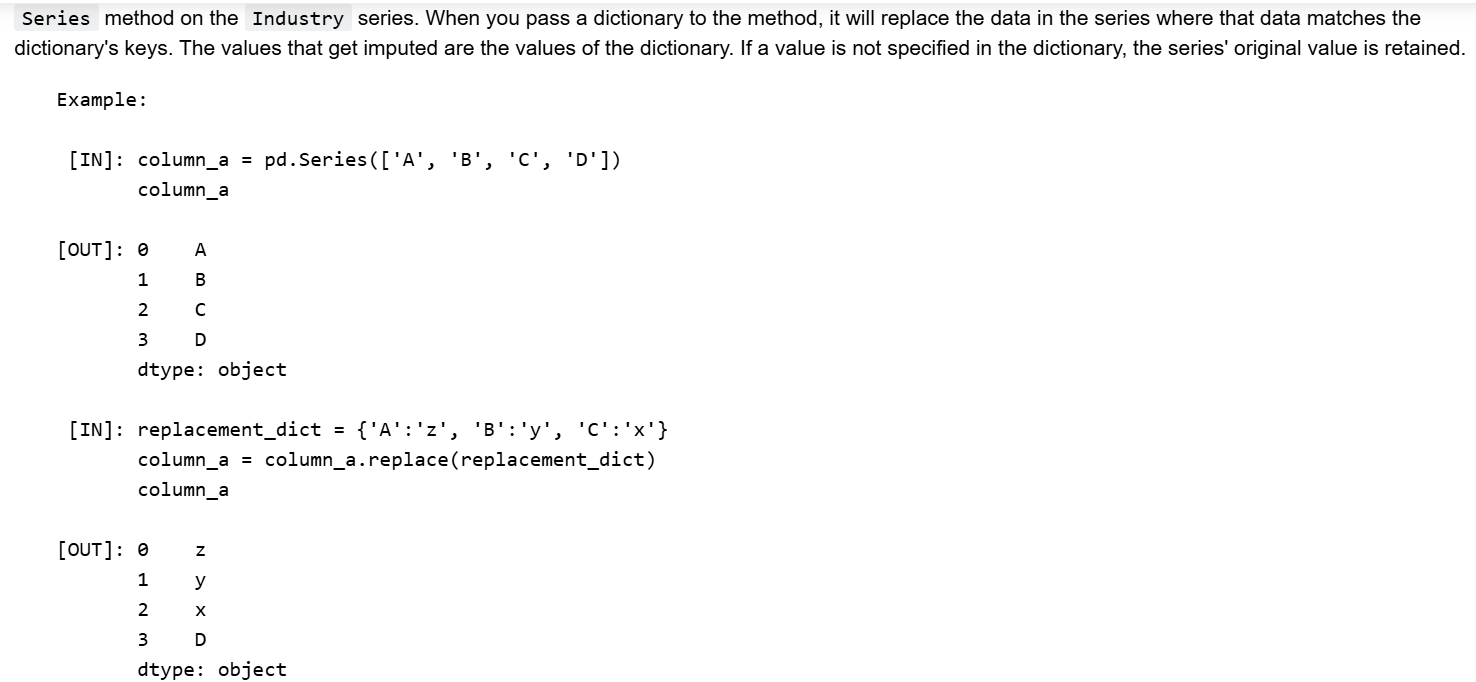

In [17]:
# 1. Create `replacement_dict`

dataset_industries = companies["Industry"].unique()
replace = [dataset_industries[-2] , dataset_industries[4], dataset_industries[0]]
print(replace)

replacement_dict = {}
for i in range(len(missing_industries)):
    replacement_dict[missing_industries[i]] = replace[i]
    
print(replacement_dict)

# 2. Replace the incorrect values in the `Industry` column
companies["Industry"] = companies["Industry"].replace(replacement_dict)

# 3. Verify that there are no longer any elements in `Industry` that are not in `industry_list`
set(companies["Industry"]) - set(industry_list)

['Data management & analytics', 'Fintech', 'Artificial intelligence']
{'FinTech': 'Data management & analytics', 'Data management and analytics': 'Fintech', 'Artificial Intelligence': 'Artificial intelligence'}


set()

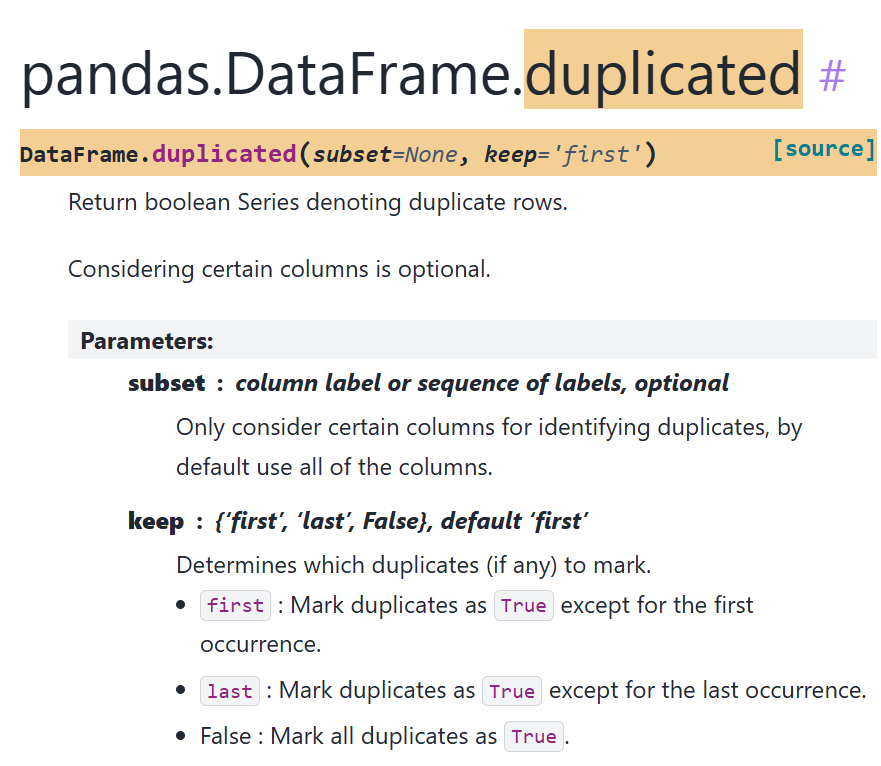

In [18]:
companies[ companies.duplicated(subset="Company", keep= False)]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
385,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,United Kingdom,Europe,2007,$233M,"TSG Consumer Partners, Crowdcube",10
386,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,UnitedKingdom,Europe,2007,$233M,TSG Consumer Partners,10
510,ZocDoc,2,2015-08-20,Health,New York,United States,North America,2007,$374M,"Founders Fund, Khosla Ventures, Goldman Sachs",8
511,ZocDoc,2,2015-08-20,Health,NaN,United States,North America,2007,$374M,Founders Fund,8
1031,SoundHound,1,2018-05-03,Artificial intelligence,Santa Clara,United States,North America,2005,$215M,"Tencent Holdings, Walden Venture Capital, Glob...",13
1032,SoundHound,1,2018-05-03,Other,Santa Clara,United States,North America,2005,$215M,Tencent Holdings,13


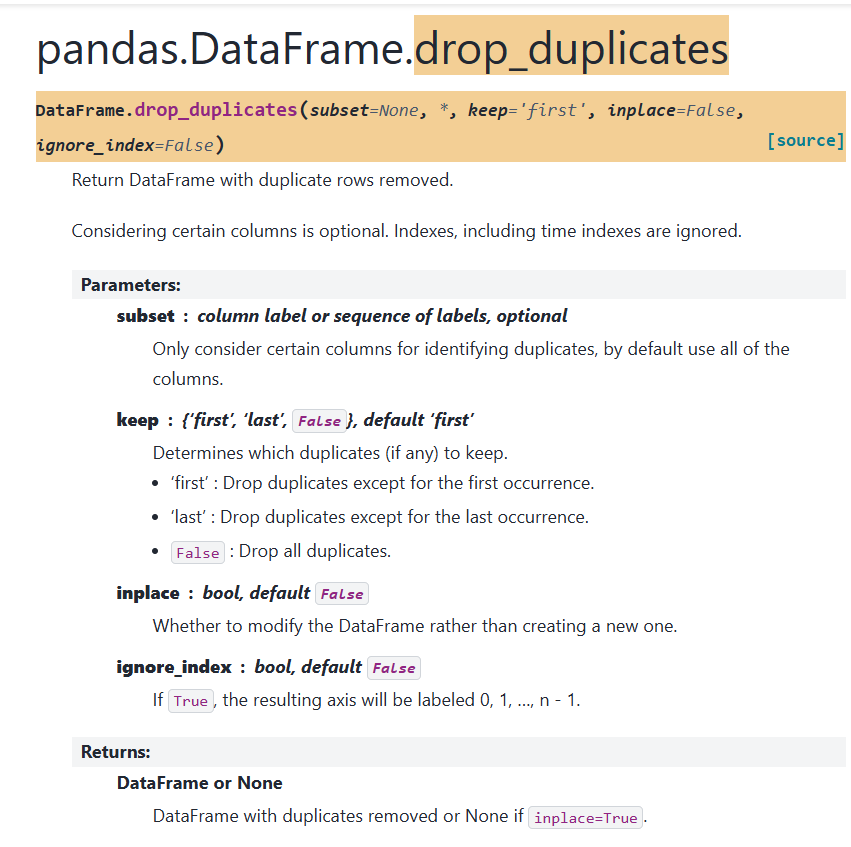

In [19]:
companies.drop_duplicates(subset= "Company", keep= "first", inplace= True)

In [20]:
levels = ["high" , "low"]
companies["High Valuation"] = pd.qcut(companies["Valuation"], 2, labels= levels)
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,low
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,low
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,low
3,Stripe,95,2014-01-23,Data management & analytics,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,low
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,low
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",6,low
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",7,low
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2,low
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2,low
9,Databricks,38,2019-02-05,Fintech,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",6,low


In [21]:
companies[ companies["High Valuation"] == "high"]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation
354,1047 Games,2,2021-09-14,Internet software & services,Zephyr Cove,United States,North America,2017,$127M,"VGames, Lakestar, Galaxy Interactive",4,high
355,Baiwang,2,2019-03-25,Fintech,Beijing,China,Asia,2015,$224M,"Guozhong Venture Capital Management, Shenzhen ...",4,high
356,Boba,2,2022-04-05,Fintech,San Francisco,United States,North America,2018,$45M,"DeFi Technologies, Hypersphere Ventures, M13",4,high
357,Bought By Many,2,2021-06-01,Fintech,London,United Kingdom,Europe,2012,$477M,"Octopus Ventures, Munich Re Ventures, CommerzV...",9,high
358,Cambridge Mobile Telematics,2,2018-12-19,Mobile & telecommunications,Cambridge,United States,North America,2010,$503M,SoftBank Group,8,high
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",5,high
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2,high
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",3,high
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",16,high


In [22]:
companies[ companies["High Valuation"] == "low"]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,low
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,low
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,low
3,Stripe,95,2014-01-23,Data management & analytics,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,low
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,low
...,...,...,...,...,...,...,...,...,...,...,...,...
349,SouChe Holdings,3,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",5,low
350,TradingView,3,2021-10-14,Fintech,Westerville,United States,North America,2011,$339M,"Tiger Global Management, Insight Partners, Jum...",10,low
351,Traveloka,3,2017-01-01,Travel,Jakarta,Indonesia,Asia,2012,$1B,"Global Founders Capital, East Ventures, Expedi...",5,low
352,wefox,3,2019-03-05,Fintech,Berlin,Germany,Europe,2014,$919M,"Salesforce Ventures, Seedcamp, OMERS Ventures",5,low


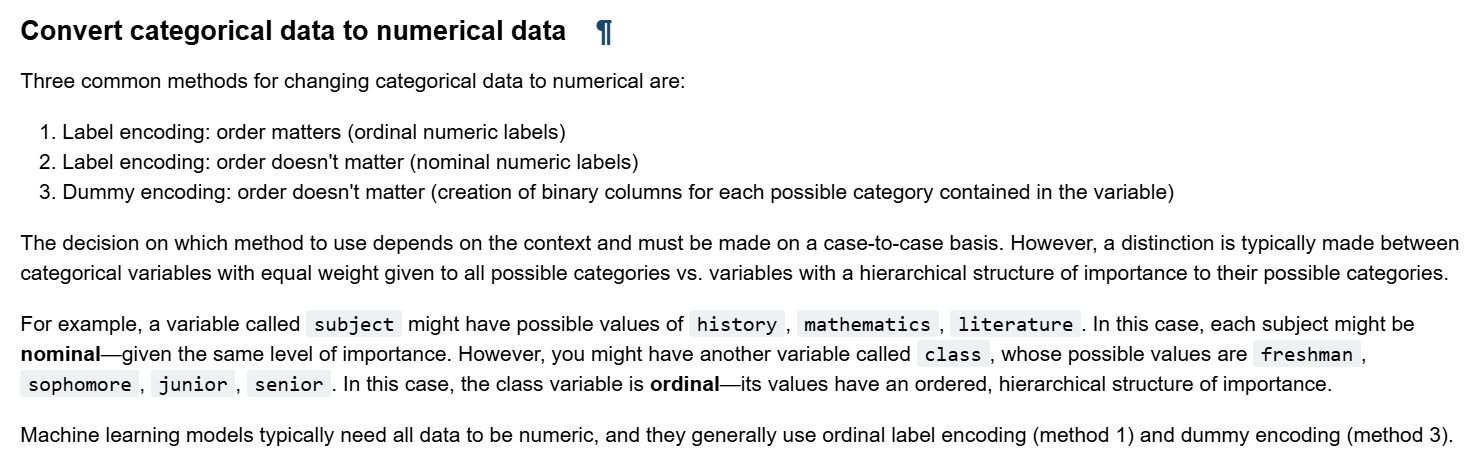

In [23]:
# Rank the continents by number of unicorn companies
continents = companies["Continent"].value_counts().reset_index()["Continent"]
print(continents, type(continents),len(continents))

0    North America
1             Asia
2           Europe
3    South America
4          Oceania
5           Africa
Name: Continent, dtype: object <class 'pandas.core.series.Series'> 6


In [24]:
continent_catg_dict = {}

for i in range(len(continents)):
    continent_catg_dict[continents.iloc[i]] = i +1

companies["Continent Catg"] = companies["Continent"].replace(continent_catg_dict)
companies.head()

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_16184\1075713419.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  companies["Continent Catg"] = companies["Continent"].replace(continent_catg_dict)


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Continent Catg
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,low,2
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,low,1
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,low,2
3,Stripe,95,2014-01-23,Data management & analytics,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,low,1
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,low,3


In [25]:
# Create `Country/Region Numeric` column

companies["Country/Region Numeric"] = companies["Country/Region"].astype("category").cat.codes
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Continent Catg,Country/Region Numeric
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,low,2,9
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,low,1,44
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,low,2,9
3,Stripe,95,2014-01-23,Data management & analytics,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,low,1,44
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,low,3,38


In [26]:
# Convert `Industry` to numeric data
# Create dummy variables with Industry values
industry_mtx_dummy = pd.get_dummies(companies["Industry"])
industry_mtx_dummy

# Combine `companies` DataFrame with new dummy Industry columns
companies = pd.concat([companies,industry_mtx_dummy], axis=1)

In [27]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Continent Catg,Country/Region Numeric,Artificial intelligence,Auto & transportation,Consumer & retail,Cybersecurity,Data management & analytics,E-commerce & direct-to-consumer,Edtech,Fintech,Hardware,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,low,2,9,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,low,1,44,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,low,2,9,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,Stripe,95,2014-01-23,Data management & analytics,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,low,1,44,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,low,3,38,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
